<a href="https://colab.research.google.com/github/ArthBachhuka123/MachineLearning/blob/main/Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
119,15701962,Male,41,59000,0
285,15734161,Female,37,93000,1
259,15815236,Female,45,131000,1
266,15721592,Male,40,75000,0
93,15699284,Female,29,28000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
227,56,133000,1
104,19,21000,0
54,27,58000,0
33,28,44000,0
68,22,63000,0


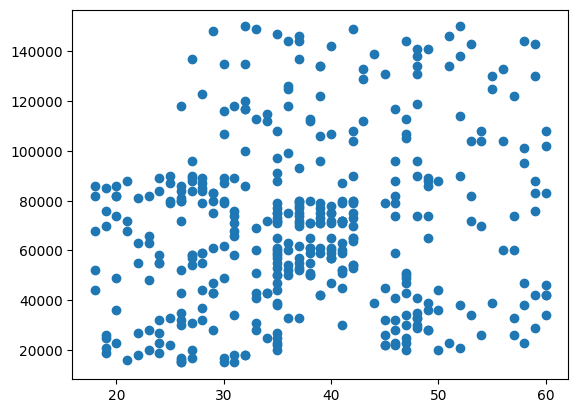

In [15]:
plt.scatter(df["Age"],df["EstimatedSalary"])

In [18]:
df.iloc[:,0:2]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df["Purchased"],test_size=0.2)
X_train.shape

(320, 2)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [26]:
X_train_scaled

array([[-0.31963608,  0.09964458],
       [-0.99382141, -0.3156184 ],
       [ 1.12504676, -0.87918958],
       [ 0.54717363,  1.90900468],
       [-0.22332389, -0.28595676],
       [ 0.06561268,  0.06998293],
       [-0.89750922,  0.45558427],
       [-0.89750922, -0.40460332],
       [-1.18644579,  0.63355412],
       [ 0.73979801,  1.8496814 ],
       [ 0.64348582, -0.87918958],
       [ 0.8361102 ,  0.15896786],
       [-0.31963608,  1.37509514],
       [-0.1270117 , -0.25629512],
       [ 2.18448085,  0.98949381],
       [-0.89750922, -0.28595676],
       [ 1.31767114,  2.29460602],
       [-0.60857265,  0.15896786],
       [ 1.79923209, -0.25629512],
       [-0.99382141, -0.43426496],
       [ 1.7029199 ,  1.67171155],
       [ 0.8361102 ,  0.39626099],
       [-0.60857265,  0.21829114],
       [ 1.12504676, -1.20546763],
       [-0.22332389,  2.32426766],
       [-0.22332389, -0.25629512],
       [-1.37907016, -0.61223481],
       [-0.1270117 ,  2.23528274],
       [-1.47538235,

In [27]:
X_test_scaled

array([[-0.03069951,  2.23528274],
       [ 1.99185647, -1.35377584],
       [-0.70488484,  0.3369377 ],
       [ 0.16192487, -0.79020466],
       [ 0.45086144,  2.38359094],
       [ 0.16192487,  1.10814037],
       [ 1.02873457,  1.49374171],
       [-0.41594827, -0.52324989],
       [ 1.31767114,  1.93866632],
       [-1.76431892,  0.21829114],
       [-0.03069951,  0.72253904],
       [-1.0901336 , -0.99783615],
       [-0.22332389, -1.23512927],
       [-0.89750922, -0.73088138],
       [ 0.93242239,  1.07847873],
       [-0.41594827, -1.11648271],
       [ 1.02873457,  2.05731289],
       [ 0.45086144,  0.04032129],
       [-0.89750922,  1.61238827],
       [-0.03069951,  0.24795278],
       [ 1.02873457,  0.15896786],
       [-0.80119703,  0.42592263],
       [-0.22332389, -1.35377584],
       [ 1.89554428, -1.05715943],
       [ 1.02873457,  1.93866632],
       [-1.0901336 ,  0.45558427],
       [-1.76431892, -1.4724224 ],
       [-1.0901336 , -1.53174569],
       [-1.0901336 ,

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [30]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.3,68640.6
std,10.4,33766.4
min,18.0,15000.0
25%,29.0,43000.0
50%,37.0,67000.0
75%,45.0,87000.0
max,60.0,150000.0


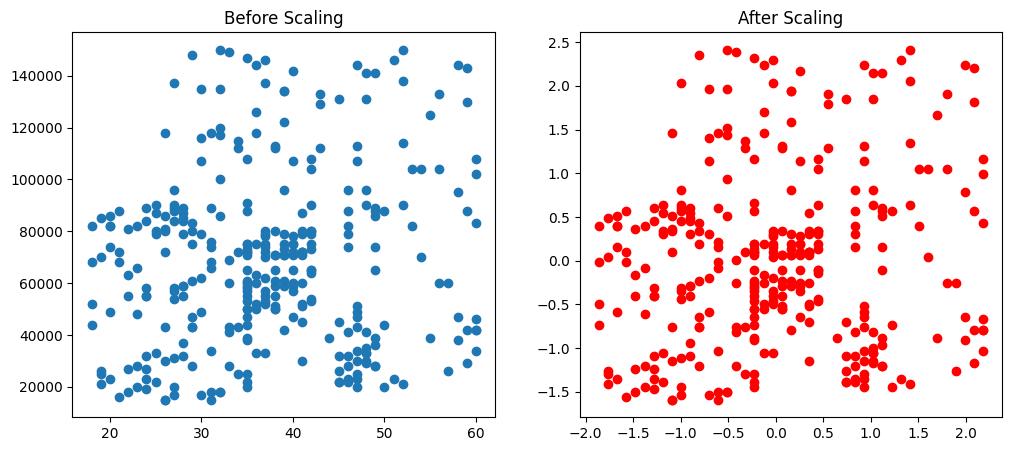

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: ylabel='Density'>

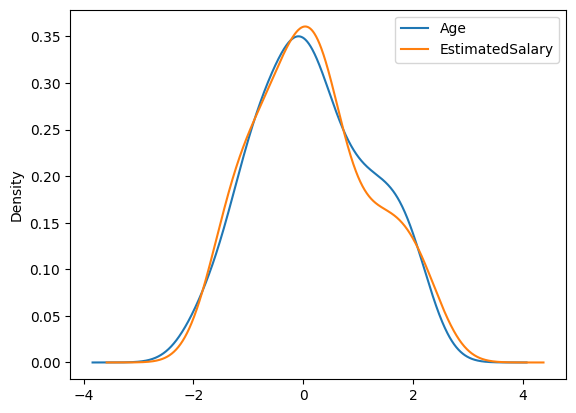

In [33]:
X_test_scaled.plot(kind="kde")

Text(0.5, 1.0, 'After Scaling')

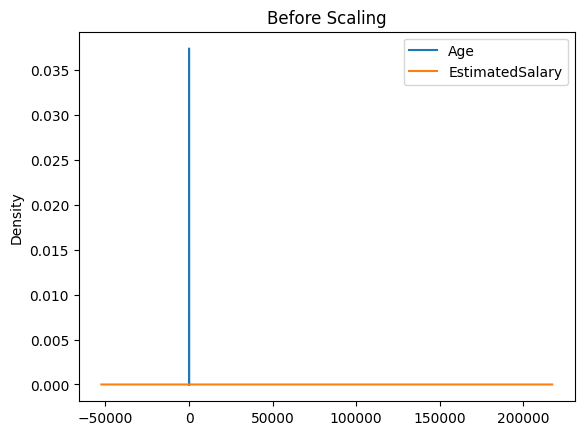

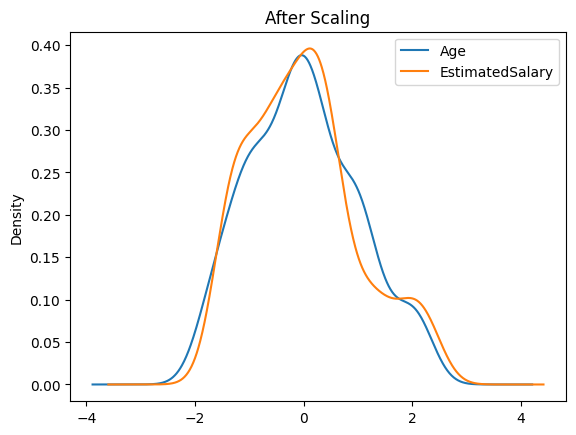

In [37]:


ax1 = X_train.plot(kind="kde")
ax1.set_title('Before Scaling')

ax2 = X_train_scaled.plot(kind="kde")
ax2.set_title('After Scaling')

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [42]:
lr.coef_[0]

np.float64(0.2792402351202754)

In [40]:
lr.intercept_

np.float64(0.3531250000000001)

In [41]:
y_pred = lr.predict(X_test_scaled)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.round(y_pred))

0.9